In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import RobustScaler
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import pairwise_distances

In [10]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [8]:
# Menghapus kolom yang tidak relevan
df_cleaned = df.drop(columns=['ID', 'Dt_Customer', 'Marital_Status'])

# Mengambil hanya kolom numerik
numeric_data = df_cleaned.select_dtypes(include=[np.number])

In [61]:
# Menstandarisasi data
scaler = RobustScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [62]:
from sklearn.model_selection import GridSearchCV

# KMeans Grid Search untuk tuning hyperparameter
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
    'n_init': [10, 20]
}
kmeans_grid = GridSearchCV(KMeans(), param_grid, cv=5)
kmeans_grid.fit(data_scaled)

# Melihat hasil terbaik dari Grid Search
print("Best Parameters for KMeans:", kmeans_grid.best_params_)

Best Parameters for KMeans: {'init': 'random', 'max_iter': 300, 'n_clusters': 6, 'n_init': 10}


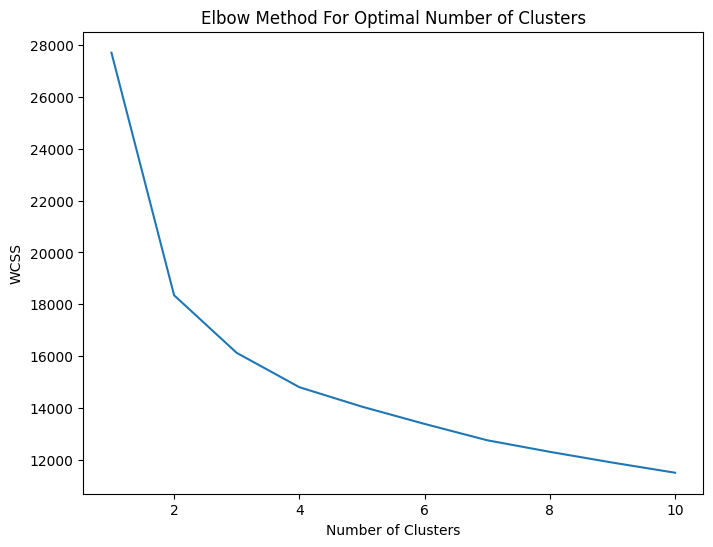

In [63]:
# Elbow Method untuk menentukan jumlah cluster optimal pada KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# KMeans Clustering
optimal_clusters = 6  # Berdasarkan Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Silhouette Score untuk KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)

In [72]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)  # Menggunakan jumlah cluster yang sudah ditentukan sebelumnya
agg_labels = agg_clustering.fit_predict(data_scaled)

# Menghitung Silhouette Score untuk Agglomerative Clustering
silhouette_agg = silhouette_score(data_scaled, agg_labels)

In [73]:
# Menghitung Calinski-Harabasz Index untuk KMeans dan Agglomerative Clustering
calinski_kmeans = calinski_harabasz_score(data_scaled, kmeans_labels)
calinski_agg = calinski_harabasz_score(data_scaled, agg_labels)

In [74]:
# Menghitung Davies-Bouldin Index untuk KMeans dan Agglomerative Clustering
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
davies_bouldin_agg = davies_bouldin_score(data_scaled, agg_labels)

In [75]:
# Menghitung Dunn Index untuk KMeans dan Agglomerative Clustering
def dunn_index(data, labels):
    clusters = np.unique(labels)
    min_dist = np.inf
    max_intracluster_dist = -np.inf
    for cluster in clusters:
        cluster_points = data[labels == cluster]
        if len(cluster_points) > 1:
            intra_dist = pairwise_distances(cluster_points).max()
            max_intracluster_dist = max(max_intracluster_dist, intra_dist)
        for other_cluster in clusters:
            if cluster != other_cluster:
                other_cluster_points = data[labels == other_cluster]
                dist = np.min(cdist(cluster_points, other_cluster_points))
                min_dist = min(min_dist, dist)
    return min_dist / max_intracluster_dist if max_intracluster_dist != 0 else 0

dunn_kmeans = dunn_index(data_scaled, kmeans_labels)
dunn_agg = dunn_index(data_scaled, agg_labels)

In [76]:
# Menampilkan hasil evaluasi
print("Evaluasi untuk KMeans (6 clusters):")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Calinski-Harabasz Index: {calinski_kmeans}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans}")
print(f"Dunn Index: {dunn_kmeans}")

print("\nEvaluasi untuk Agglomerative Clustering:")
print(f"Silhouette Score: {silhouette_agg}")
print(f"Calinski-Harabasz Index: {calinski_agg}")
print(f"Davies-Bouldin Index: {davies_bouldin_agg}")
print(f"Dunn Index: {dunn_agg}")

Evaluasi untuk KMeans (6 clusters):
Silhouette Score: 0.23611677620836663
Calinski-Harabasz Index: 472.74719324854277
Davies-Bouldin Index: 1.9279203634851025
Dunn Index: 0.032483022781138814

Evaluasi untuk Agglomerative Clustering:
Silhouette Score: 0.21243560664270014
Calinski-Harabasz Index: 405.50115292228327
Davies-Bouldin Index: 2.201525910702236
Dunn Index: 0.03233204946423791


## Silhouette Coefficient
Silhouette score mengukur seberapa mirip suatu titik dengan cluster-nya sendiri dibandingkan dengan cluster lain.

\[
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
\]

- \( a(i) \): rata-rata jarak titik \(i\) ke semua titik lain dalam cluster yang sama.
- \( b(i) \): jarak rata-rata terkecil titik \(i\) ke semua titik di cluster lain.

Nilai mendekati 1 berarti cluster bagus, mendekati -1 berarti buruk.

## Calinski-Harabasz Index
Mengukur rasio antara dispersi antar-cluster terhadap dispersi intra-cluster.

\[
CH = \frac{Tr(B_k) / (k-1)}{Tr(W_k) / (n-k)}
\]

- \( Tr(B_k) \): trace dari matriks dispersi antar-cluster.
- \( Tr(W_k) \): trace dari matriks dispersi dalam-cluster.
- \( n \): jumlah total data.
- \( k \): jumlah cluster.

Semakin besar nilainya, semakin baik pemisahan cluster.

## Davies-Bouldin Index
Mengukur rata-rata "kemiripan" antar semua cluster. Semakin kecil, semakin bagus.

\[
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} R_{ij}
\]

\[
R_{ij} = \frac{s_i + s_j}{d_{ij}}
\]

- \( s_i \): jarak rata-rata antara titik dalam cluster \(i\) ke centroid-nya.
- \( d_{ij} \): jarak antara centroid cluster \(i\) dan \(j\).